In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


# **The PTB Diagnostic ECG Database**

* Number of Samples: 14552
* Number of Categories: 2
* Sampling Frequency: 125Hz
* Data Source: Physionet's PTB Diagnostic Database

In [24]:
df_abnormal= pd.read_csv('/kaggle/input/heartbeat/ptbdb_abnormal.csv', header=None)
df_normal=pd.read_csv('/kaggle/input/heartbeat/ptbdb_normal.csv',header=None)

#concat the data frame
df=pd.concat([df_abnormal, df_normal], axis=0)
#split target and value
df_target=df[187]
df_data=df.drop(187,axis=1)

# **Visualization**

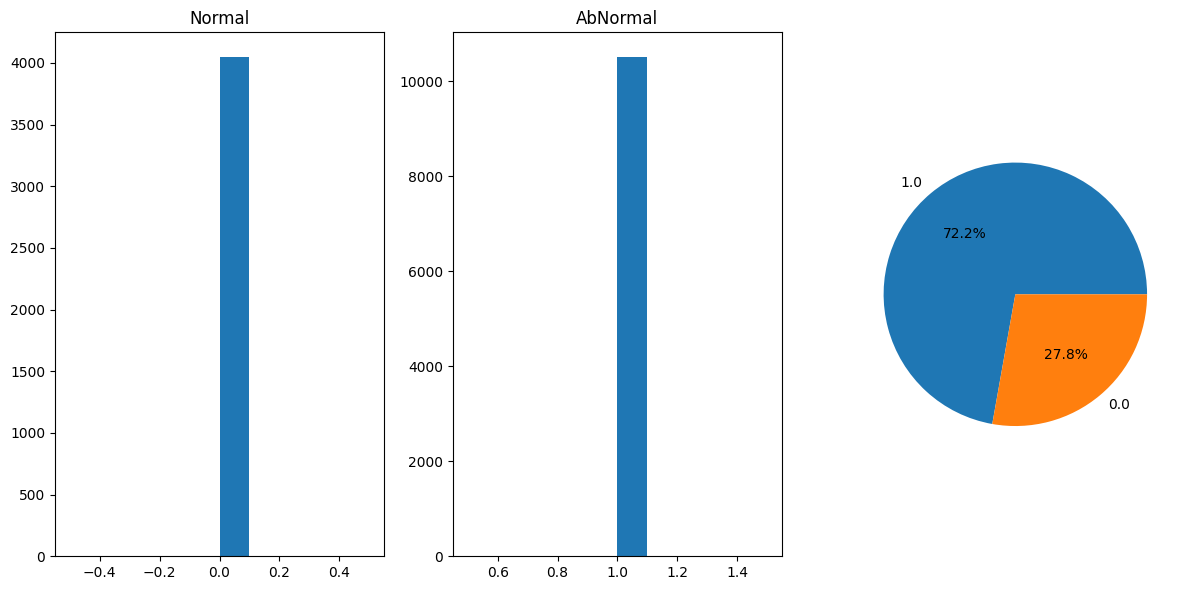

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.hist(df_normal[187])
plt.title("Normal")

plt.subplot(1,3,2)
plt.hist(df_abnormal[187])
plt.title("AbNormal")

plt.subplot(1,3,3)
plt.pie(df[187].value_counts(),labels=df[187].unique(),autopct='%1.1f%%')

plt.tight_layout()
plt.show()

In [26]:
print("Abnormal\n",df_abnormal.describe())
print("\nNormal\n",df_normal.describe())
print("\ntarget\n",df_target.describe())

Abnormal
                 0             1             2             3             4    \
count  10506.000000  10506.000000  10506.000000  10506.000000  10506.000000   
mean       0.975468      0.725582      0.438306      0.290384      0.252897   
std        0.036354      0.199030      0.262699      0.270977      0.237004   
min        0.624227      0.000000      0.000000      0.000000      0.000000   
25%        0.957325      0.586602      0.236455      0.074064      0.088487   
50%        1.000000      0.745646      0.404297      0.212845      0.173046   
75%        1.000000      0.890043      0.620889      0.427811      0.343089   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  10506.000000  10506.000000  10506.000000  10506.000000  10506.000000   
mean       0.249423      0.245668      0.247160      0.250203      0.252396   
std        0.211751      0.200159      0.

# **Decision Tree**

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
clf = DecisionTreeClassifier()

In [28]:
X = df_data
y = df_target

#Split the data for train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
clf = DecisionTreeClassifier()

In [30]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
predictions = clf.predict(X_test)

In [32]:
dt_accuracy = accuracy_score(y_test, predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 0.9196


In [33]:
dt_report=classification_report(y_test, predictions)
print(dt_report)

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85       762
         1.0       0.95      0.94      0.95      2149

    accuracy                           0.92      2911
   macro avg       0.89      0.90      0.90      2911
weighted avg       0.92      0.92      0.92      2911



# **Random Forest**

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_clf= RandomForestClassifier(n_estimators=100, random_state=50)

In [36]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

In [37]:
predictions = rf_clf.predict(X_test)

In [38]:
rf_accuracy = accuracy_score(y_test, predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.9780


In [39]:
rf_report= classification_report(y_test, predictions)
print(rf_report)

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       762
         1.0       0.98      0.99      0.99      2149

    accuracy                           0.98      2911
   macro avg       0.98      0.97      0.97      2911
weighted avg       0.98      0.98      0.98      2911



In [40]:
import xgboost as xgb

In [41]:
model = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100
)

In [42]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
predictions = model.predict(X_test)

In [44]:
xgb_accuracy = accuracy_score(y_test, predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

XGBoost Accuracy: 0.9323


In [45]:
xgb_report=classification_report(y_test, predictions)
print(xgb_report)

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       762
         1.0       0.96      0.95      0.95      2149

    accuracy                           0.93      2911
   macro avg       0.91      0.92      0.91      2911
weighted avg       0.93      0.93      0.93      2911



# **Hyper Parameter Tunning**

In [50]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200]
}


model = xgb.XGBClassifier(objective='binary:logistic')


grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)


hyp_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy with best model: {hyp_accuracy:.4f}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Accuracy with best model: 0.9821


In [47]:
hypt_report=classification_report(y_test, predictions)
print(hypt_report)

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       762
         1.0       0.99      0.99      0.99      2149

    accuracy                           0.98      2911
   macro avg       0.98      0.98      0.98      2911
weighted avg       0.98      0.98      0.98      2911



In [48]:
#comparison 
print("Decision Tree\n",dt_report,"\nRandom Forest\n",rf_report,"\nXGBoost\n",xgb_report,"\nHyperparametric Tunning\n",hypt_report)

Decision Tree
               precision    recall  f1-score   support

         0.0       0.83      0.86      0.85       762
         1.0       0.95      0.94      0.95      2149

    accuracy                           0.92      2911
   macro avg       0.89      0.90      0.90      2911
weighted avg       0.92      0.92      0.92      2911
 
Random Forest
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       762
         1.0       0.98      0.99      0.99      2149

    accuracy                           0.98      2911
   macro avg       0.98      0.97      0.97      2911
weighted avg       0.98      0.98      0.98      2911
 
XGBoost
               precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       762
         1.0       0.96      0.95      0.95      2149

    accuracy                           0.93      2911
   macro avg       0.91      0.92      0.91      2911
weighted avg       0.93      0.93

In [49]:
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"Accuracy with best model: {hyp_accuracy:.4f}")

Decision Tree Accuracy: 0.9196
Random Forest Accuracy: 0.9780
XGBoost Accuracy: 0.9323
Accuracy with best model: 0.9821
